# Install library

In [56]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Dataset

In [62]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # load data
x_train,x_test = x_train/255.0,x_test/255.0 # normalization

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [64]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [36]:
# No method on keras to get cifar10 category label name by categoly label?
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

bird_ind = np.where(cifar10_labels=='bird')
deer_ind = np.where(cifar10_labels=='deer')
truck_ind = np.where(cifar10_labels=='truck')

In [86]:
remove_num = 2500
train_num = len(y_train) - remove_num * 3
x_train_removed =  np.zeros(x_train.shape)[:train_num]
y_train_removed =  np.zeros(y_train.shape)[:train_num]

bird_limit, deer_limit, truck_limit = 0, 0, 0
for i, label in enumerate(y_train):
    if label == bird_ind:
        if bird_limit < 2500:
            bird_limit += 1
            x_train_removed[i] = x_train[i]
            y_train_removed[i] = y_train[i]
            continue
        else: continue
    if label == deer_ind:
        if deer_limit < 2500:
            deer_limit += 1
            x_train_removed[i] = x_train[i]
            y_train_removed[i] = y_train[i]
            continue
        else: continue
    if label == truck_ind:
        if truck_limit < 2500:
            truck_limit += 1
            x_train_removed[i] = x_train[i]
            y_train_removed[i] = y_train[i]
            continue
        else: continue
    
    x_train_removed[i] = y_train[i]
    y_train_removed[i] = y_train[i]

y_train_removed = np.array(y_train_removed, dtype='uint8')

IndexError: index 42500 is out of bounds for axis 0 with size 42500

In [84]:
print(x_train_removed.shape)
print(y_train_removed.shape)

(42500, 32, 32, 3)
(42500, 1)


In [85]:
df = pd.DataFrame(y_train_removed.flatten())
df.value_counts()

0    35000
2     2500
4     2500
9     2500
dtype: int64

(array([4.249e+04, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

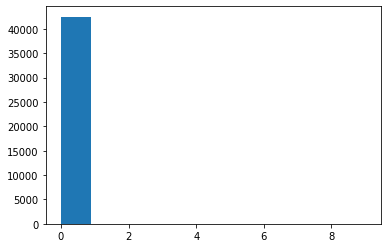

In [69]:
import matplotlib.pyplot as plt

# ヒストグラムを描画する
plt.hist(y_train_removed.flatten())

In [59]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [12]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = tf.keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)